In [ ]:
!pip install -qq google-play-scraper

     |████████████████████████████████| 52 kB 532 kB/s 


In [ ]:
import os
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2), 

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SavePath = '/content/drive/MyDrive/Colab Notebooks/FDA_indi/'

os.makedirs(SavePath, exist_ok = True)

In [ ]:
app_packages = [
  'com.garena.game.codm',
  'com.rekoo.pubgm',
  'com.generagames.resistance',
  'com.fungames.sniper3d',
  'com.habby.archero',
  'com.dts.freefiremax',
  'com.playgendary.bowmasters',
]

In [ ]:
app_packages = [
                'com.anydo',
                'com.todoist',
                'com.microsoft.todos',
                'com.panagola.app.tictactoecalendar',
                'cc.forestapp',
                'com.habitnow',
                'com.artfulagenda.app',
                'com.tasks.android',
                'notion.id',
                'com.clover.ibetter',
                'com.socialnmobile.dictapps.notepad.color.note',
                'com.evernote',
                'com.ticktick.task',
                'org.dayup.gnotes',
                'com.gmail.jmartindev.timetune',
                'com.headway.books',
                'com.habitrpg.android.habitica',
                'com.oristats.habitbull',
                'com.levor.liferpgtasks',
                'prox.lab.calclock',
                'com.appgenix.bizcal',
                'com.appxy.planner',
                'works.jubilee.timetree',
                'com.symcoding.widget.stickynotes',
                'com.hellowo.day2life',
                'com.dddev.Shift_Work_Calendar'
]

In [ ]:
app_infos = []
for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 26/26 [00:04<00:00,  6.04it/s]


In [ ]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_infos[0])

{
  "adSupported": false,
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support daily calendar view, 3-day Calendar view, Weekly calendar view & agenda vi

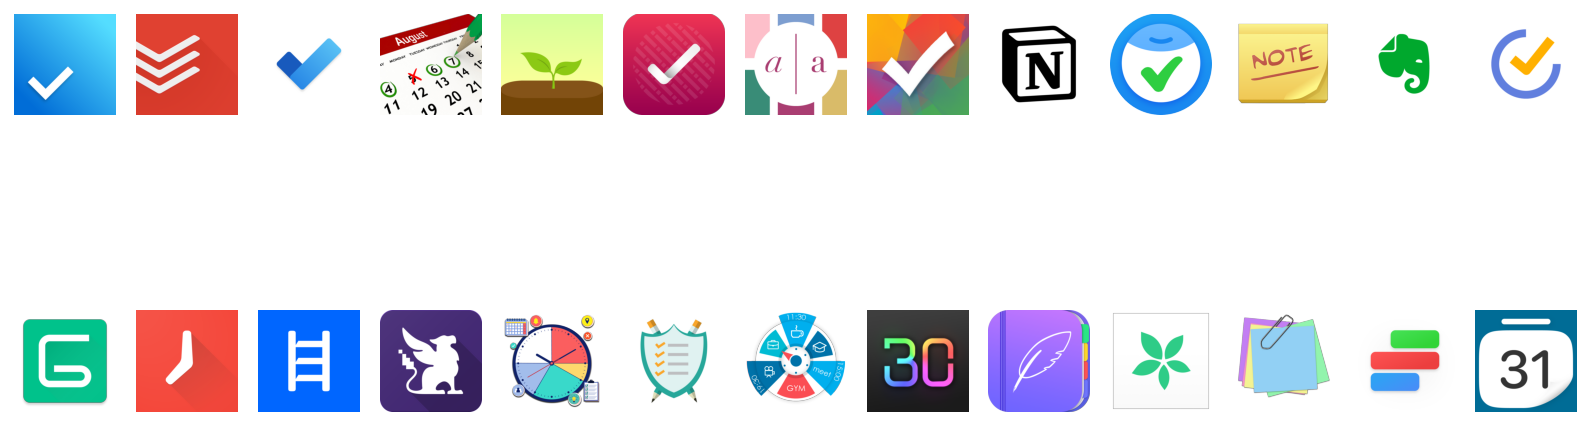

In [ ]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  # ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [ ]:
app_reviews = []
for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 26/26 [01:19<00:00,  3.06s/it]


In [ ]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "at": "2022-04-25 15:55:21",
  "content": "I used to love this app. I have used it for years. I even had (until yesterday) the paid version. I primarily use this app to sync up my alexa tasks. It started having issues, then got fixed. Now the company is saying that Amazon sync is no longer usable (unless you want to add a 3rd party to allow it access to your Amazon account).",
  "repliedAt": "2022-04-26 16:53:39",
  "replyContent": "Unfortunately, Amazon has rejected our fix and will not be reopening the Any.do Skill just yet.\nAt this point in time, our efforts seem to be blocked and we will not be able to offer with any estimate to when the integration will be reactivated :(",
  "reviewCreatedVersion": "5.15.4.2",
  "reviewId": "99974541-f5b2-4b30-8053-77d120d6d6e3",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 35,
  "userImage": "https://play-lh.googleusercontent.com/a/AATXAJzFdtk_ASxO4LxjZWEzWXUheo_ISStcYw10go8Z=mo",
  "userName": "Br

In [ ]:
len(app_reviews)

27702

In [ ]:
len(app_reviews)

27702

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv(os.path.join(SavePath,'reviews_26apps.csv'), index=None, header=True)